In [1]:
#load package
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

[ Info: Precompiling Nevanlinna [0b21cfa8-e591-48a4-a07b-a9d20be7c264]


In [2]:
# Set work data Type
T = BigFloat
setprecision(2048)
;

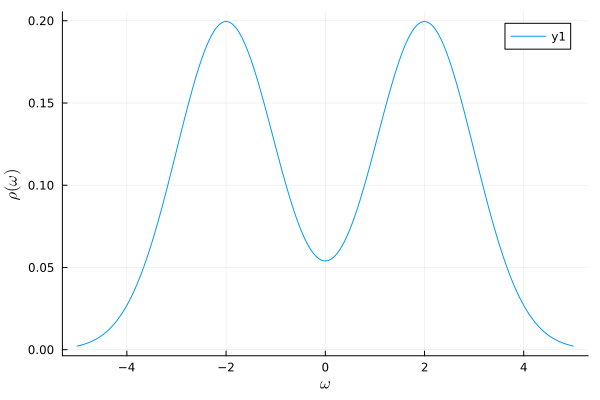

In [3]:
#define spectral function
gaussian(x, mu, sigma) = exp(-0.5*((x-mu)/sigma)^2)/(sqrt(2*π)*sigma)
#rho(omega) = gaussian(omega, 0.0, 1.0)
rho(omega) = 0.5*gaussian(omega, 2.0, 1.0) + 0.5*gaussian(omega, -2.0, 1.0)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [7]:
#moments = Complex{T}.([1, 0, 1, 0, 3, 0, 15, 0, 105, 0, 945])
#moments = Complex{T}.([1, 0, 1])
#moments = Complex{T}.([1])

moments = Complex{T}.([1, 0, 5, 0, 43, 0, 499, 0, 7193, 0, 123109, 0, 2430355, 0, 54229907])
#moments = Complex{T}.([1, 0, 5, 0, 43])

15-element Vector{Complex{BigFloat}}:
           1.0 + 0.0im
           0.0 + 0.0im
           5.0 + 0.0im
           0.0 + 0.0im
          43.0 + 0.0im
           0.0 + 0.0im
         499.0 + 0.0im
           0.0 + 0.0im
        7193.0 + 0.0im
           0.0 + 0.0im
      123109.0 + 0.0im
           0.0 + 0.0im
  2.430355e+06 + 0.0im
           0.0 + 0.0im
 5.4229907e+07 + 0.0im

In [8]:
wo_ham_nev_sol = Nevanlinna.HamburgerNevanlinnaSolver(moments, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

Rank of Hankel matrix:8
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 27


In [10]:
ham_nev_sol = Nevanlinna.HamburgerNevanlinnaSolver(moments, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=true)

Rank of Hankel matrix:8
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 27
H=1
Iter     Function value   Gradient norm 
     0     1.783305e+00     5.789275e-01
 * time: 0.017605066299438477
     1     1.566034e+00     8.990416e-01
 * time: 2.848331928253174
     2     1.550331e+00     7.776651e-01
 * time: 5.420396089553833
     3     1.484337e+00     2.060582e-01
 * time: 6.9515979290008545
     4     1.481670e+00     2.599316e-02
 * time: 8.46799087524414
     5     1.481442e+00     1.841400e-02
 * time: 10.027360916137695
     6     1.481401e+00     5.432746e-03
 * time: 11.540210962295532
     7     1.481397e+00     2.740522e-03
 * time: 13.134643077850342
     8     1.481397e+00     7.734086e-04
 * time: 14.716961860656738
     9     1.481396e+00     3.898858e-04
 * time: 17.15327000617981
    10     1.481396e+00     4.868451e-05
 * time: 19.31697988510132
    11     1.481396e+00     2.280238e-05
 * time: 22.053991079330444
    12   

Nevanlinna.HamburgerNevanlinnaSolver{BigFloat}(Complex{BigFloat}[1.0 + 0.0im, 0.0 + 0.0im, 5.0 + 0.0im, 0.0 + 0.0im, 43.0 + 0.0im, 0.0 + 0.0im, 499.0 + 0.0im, 0.0 + 0.0im, 7193.0 + 0.0im, 0.0 + 0.0im, 123109.0 + 0.0im, 0.0 + 0.0im, 2.430355e+06 + 0.0im, 0.0 + 0.0im, 5.4229907e+07 + 0.0im], 15, 8, 8, 8, true, false, true, false, Complex{BigFloat}[3971.4930841080801412313431641174033564855576608206606548149988506063611734188473662877402921060669414539221216974142805276068984108912571164755172751622758122114909908669629690342468077912880444491971213292241176722953871215405332546153437327310809486883785737657785493051451213522760235206279339153085785746622415545180774966654777859668961825403584443293272109178948743447015514572966645813229616832501650452425668809426692698244789468864879332877844749256095788352768437842777037484319901542748798899655694172926433044138636723094743973367364776559797604266651640239150716562089988237124710170308761068916874187191 - 0.0im, 0.0013512826988970111845

In [11]:
Nevanlinna.solve!(ham_nev_sol)

H=1
Iter     Function value   Gradient norm 
     0     1.481396e+00     2.547872e-09
 * time: 0.0002129077911376953
max_theta=0.329586983270122170729270621522741459415748661436548379911347234780758104750811222673473296481823135192422632265197098324981408136286626327810108526851439251899983282857117134987424093372339027158075265380623846324131351428110826011895316970149239797749688516294506296159267879103219385209198341855834547988410013112842220410272235001634337011988738874040394282378161817697918960845080403852882727861977518689793447063580815181493492749289969914992087139212055285304944450459265653601781758239454142710326582432374678942790624851822260620303825798683226751568332991488216053506803514623218256809816609501469604732522477
hardy optimization was success.
H=2
Iter     Function value   Gradient norm 
     0     1.481396e+00     8.901554e-01
 * time: 0.0002639293670654297
     1     1.421371e+00     5.216901e-01
 * time: 1.773866891860962
     2     1.394292e+00     8.16935

    49     1.018817e+00     3.036235e-06
 * time: 94.56794214248657
    50     1.018817e+00     2.234967e-06
 * time: 96.10618901252747
    51     1.018817e+00     1.463843e-06
 * time: 97.73211002349854
    52     1.018817e+00     8.581344e-07
 * time: 99.38723492622375
    53     1.018817e+00     1.300799e-06
 * time: 101.07722306251526
    54     1.018817e+00     7.910661e-07
 * time: 102.74264597892761
    55     1.018817e+00     7.688875e-07
 * time: 104.44036602973938
    56     1.018817e+00     3.919458e-07
 * time: 106.12482500076294
    57     1.018817e+00     4.116325e-07
 * time: 107.74327898025513
    58     1.018817e+00     2.806873e-07
 * time: 109.53559494018555
    59     1.018817e+00     2.976833e-07
 * time: 111.18287706375122
    60     1.018817e+00     1.681178e-07
 * time: 112.92339706420898
    61     1.018817e+00     1.477742e-07
 * time: 114.59840798377991
    62     1.018817e+00     1.010304e-07
 * time: 116.38936996459961
    63     1.018817e+00     1.076701e-

    85     8.809833e-01     6.427901e-08
 * time: 156.836186170578
    86     8.809833e-01     9.037516e-08
 * time: 158.55749917030334
    87     8.809833e-01     4.603840e-08
 * time: 160.09551095962524
    88     8.809833e-01     6.344162e-08
 * time: 161.68672704696655
    89     8.809833e-01     4.073805e-08
 * time: 163.29490494728088
    90     8.809833e-01     4.990112e-08
 * time: 164.91762900352478
    91     8.809833e-01     2.686902e-08
 * time: 166.49977016448975
    92     8.809833e-01     3.665038e-08
 * time: 168.11399698257446
    93     8.809833e-01     2.376640e-08
 * time: 169.75054502487183
    94     8.809833e-01     2.809007e-08
 * time: 171.39940404891968
    95     8.809833e-01     1.401427e-08
 * time: 173.05519700050354
    96     8.809833e-01     2.174126e-08
 * time: 174.72245407104492
    97     8.809833e-01     1.454027e-08
 * time: 176.37626600265503
    98     8.809833e-01     1.539495e-08
 * time: 178.05535006523132
    99     8.809833e-01     9.141222

    95     7.444658e-01     2.054934e-06
 * time: 189.98958897590637
    96     7.444658e-01     1.854602e-06
 * time: 191.81217098236084
    97     7.444658e-01     1.670673e-06
 * time: 193.56764197349548
    98     7.444658e-01     1.562779e-06
 * time: 195.4283480644226
    99     7.444658e-01     1.313695e-06
 * time: 197.1767179965973
   100     7.444658e-01     1.296873e-06
 * time: 199.02479314804077
   101     7.444658e-01     1.231339e-06
 * time: 200.9037971496582
   102     7.444658e-01     1.150213e-06
 * time: 202.70166015625
   103     7.444658e-01     1.125864e-06
 * time: 204.61043310165405
   104     7.444658e-01     1.047046e-06
 * time: 206.377268075943
   105     7.444658e-01     9.628442e-07
 * time: 208.26573514938354
   106     7.444658e-01     8.996703e-07
 * time: 210.08451104164124
   107     7.444658e-01     7.799043e-07
 * time: 211.84347414970398
   108     7.444658e-01     7.272915e-07
 * time: 213.71320509910583
   109     7.444658e-01     6.191546e-07
 

    42     6.056789e-01     2.570916e-03
 * time: 89.7574028968811
    43     6.056765e-01     1.217211e-03
 * time: 92.03520178794861
    44     6.056757e-01     1.182946e-03
 * time: 94.02553796768188
    45     6.056747e-01     7.086185e-04
 * time: 97.33916783332825
    46     6.056742e-01     9.319899e-04
 * time: 100.01713395118713
    47     6.056733e-01     9.324780e-04
 * time: 102.59666085243225
    48     6.056728e-01     8.726574e-04
 * time: 104.23462796211243
    49     6.056722e-01     5.549031e-04
 * time: 107.2137508392334
    50     6.056718e-01     6.137999e-04
 * time: 108.98672580718994
    51     6.056714e-01     7.278373e-04
 * time: 111.52420401573181
    52     6.056710e-01     5.594604e-04
 * time: 113.12245893478394
    53     6.056706e-01     6.063519e-04
 * time: 116.02507901191711
    54     6.056703e-01     4.683000e-04
 * time: 117.70875382423401
    55     6.056700e-01     4.137884e-04
 * time: 120.6501247882843
    56     6.056697e-01     2.409149e-04


   162     6.056683e-01     5.405126e-07
 * time: 323.516343832016
   163     6.056683e-01     6.119336e-07
 * time: 325.34096693992615
   164     6.056683e-01     5.425194e-07
 * time: 327.48657989501953
   165     6.056683e-01     6.774671e-07
 * time: 329.33166790008545
   166     6.056683e-01     5.769642e-07
 * time: 330.964332818985
   167     6.056683e-01     6.832306e-07
 * time: 332.64921498298645
   168     6.056683e-01     5.722248e-07
 * time: 334.27433490753174
   169     6.056683e-01     6.253895e-07
 * time: 335.92557287216187
   170     6.056683e-01     5.170771e-07
 * time: 337.5326189994812
   171     6.056683e-01     5.255361e-07
 * time: 339.24444699287415
   172     6.056683e-01     4.233951e-07
 * time: 340.92815589904785
   173     6.056683e-01     4.293404e-07
 * time: 342.7384808063507
   174     6.056683e-01     3.497399e-07
 * time: 344.88245487213135
   175     6.056683e-01     3.552989e-07
 * time: 346.757385969162
   176     6.056683e-01     2.666314e-07
 

    24     4.271153e-01     1.909921e-03
 * time: 45.00989603996277
    25     4.271104e-01     1.509657e-03
 * time: 46.810742139816284
    26     4.271069e-01     1.246783e-03
 * time: 48.95711898803711
    27     4.271046e-01     8.393661e-04
 * time: 51.439149141311646
    28     4.271030e-01     1.237698e-03
 * time: 53.42023801803589
    29     4.271019e-01     7.112044e-04
 * time: 55.10761213302612
    30     4.271010e-01     6.563210e-04
 * time: 56.96927499771118
    31     4.271004e-01     4.129029e-04
 * time: 58.987586975097656
    32     4.271000e-01     3.653242e-04
 * time: 60.806172132492065
    33     4.270997e-01     3.898659e-04
 * time: 62.519694089889526
    34     4.270994e-01     3.198578e-04
 * time: 64.35056209564209
    35     4.270993e-01     3.699282e-04
 * time: 66.67518401145935
    36     4.270991e-01     2.744729e-04
 * time: 68.35987210273743
    37     4.270989e-01     2.646118e-04
 * time: 70.09702706336975
    38     4.270988e-01     2.390007e-04
 *

   144     4.270961e-01     1.732279e-06
 * time: 265.40426206588745
   145     4.270961e-01     2.034361e-06
 * time: 267.08595609664917
   146     4.270961e-01     1.783011e-06
 * time: 268.79929304122925
   147     4.270961e-01     1.901288e-06
 * time: 270.49673104286194
   148     4.270961e-01     1.811608e-06
 * time: 272.2651159763336
   149     4.270961e-01     1.818831e-06
 * time: 273.9919991493225
   150     4.270961e-01     1.794132e-06
 * time: 276.3683350086212
   151     4.270961e-01     1.750305e-06
 * time: 278.0302481651306
   152     4.270961e-01     1.749699e-06
 * time: 279.73414397239685
   153     4.270961e-01     1.660964e-06
 * time: 281.45400309562683
   154     4.270961e-01     1.643096e-06
 * time: 283.1657910346985
   155     4.270961e-01     1.536358e-06
 * time: 284.8722171783447
   156     4.270961e-01     1.421971e-06
 * time: 286.5311939716339
   157     4.270961e-01     1.386414e-06
 * time: 288.28277015686035
   158     4.270961e-01     1.218061e-06


   264     4.270961e-01     2.709282e-08
 * time: 483.2867109775543
   265     4.270961e-01     2.720717e-08
 * time: 485.02126717567444
   266     4.270961e-01     2.429118e-08
 * time: 487.1324670314789
   267     4.270961e-01     2.549879e-08
 * time: 489.0486710071564
   268     4.270961e-01     2.169787e-08
 * time: 490.7306749820709
   269     4.270961e-01     2.241657e-08
 * time: 492.52392506599426
   270     4.270961e-01     1.954697e-08
 * time: 494.16697001457214
   271     4.270961e-01     1.948771e-08
 * time: 495.8631660938263
   272     4.270961e-01     1.770401e-08
 * time: 497.6952431201935
   273     4.270961e-01     1.862420e-08
 * time: 499.5084002017975
   274     4.270961e-01     1.794583e-08
 * time: 501.1813340187073
   275     4.270961e-01     1.758028e-08
 * time: 502.89643597602844
   276     4.270961e-01     1.846966e-08
 * time: 504.6309561729431
   277     4.270961e-01     1.625450e-08
 * time: 506.5540750026703
   278     4.270961e-01     1.802013e-08
 * 

    81     2.522556e-01     5.238209e-02
 * time: 208.75981497764587
    82     2.508454e-01     6.084097e-02
 * time: 211.99249792099
    83     2.503948e-01     5.911355e-02
 * time: 213.72532510757446
    84     2.499852e-01     5.522326e-02
 * time: 215.4408941268921
    85     2.487151e-01     3.920398e-02
 * time: 218.2578489780426
    86     2.485052e-01     5.414216e-02
 * time: 220.2802860736847
    87     2.480580e-01     5.207523e-02
 * time: 222.02799010276794
    88     2.475565e-01     5.532873e-02
 * time: 223.80459713935852
    89     2.471423e-01     5.041237e-02
 * time: 225.61726713180542
    90     2.457082e-01     5.646596e-02
 * time: 228.35054111480713
    91     2.455462e-01     6.441100e-02
 * time: 230.2276530265808
    92     2.450169e-01     5.300055e-02
 * time: 231.98547792434692
    93     2.448374e-01     5.503804e-02
 * time: 233.87726211547852
    94     2.444079e-01     5.216911e-02
 * time: 236.12057900428772
    95     2.439649e-01     2.674342e-02


   201     2.398408e-01     2.501129e-04
 * time: 445.73804903030396
   202     2.398408e-01     2.147958e-04
 * time: 447.4222650527954
   203     2.398408e-01     2.328821e-04
 * time: 449.11256313323975
   204     2.398407e-01     1.881576e-04
 * time: 450.799978017807
   205     2.398407e-01     2.013658e-04
 * time: 452.5644860267639
   206     2.398407e-01     1.547698e-04
 * time: 454.2854700088501
   207     2.398407e-01     1.653472e-04
 * time: 455.99071502685547
   208     2.398406e-01     1.257907e-04
 * time: 457.7520089149475
   209     2.398406e-01     1.627424e-04
 * time: 460.0667691230774
   210     2.398406e-01     1.371642e-04
 * time: 461.81576800346375
   211     2.398406e-01     1.659273e-04
 * time: 463.52210903167725
   212     2.398405e-01     1.359932e-04
 * time: 465.6475329399109
   213     2.398405e-01     1.626566e-04
 * time: 467.32009100914
   214     2.398405e-01     1.221305e-04
 * time: 469.02225613594055
   215     2.398405e-01     1.491909e-04
 * t

LoadError: InterruptException:

In [12]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 33


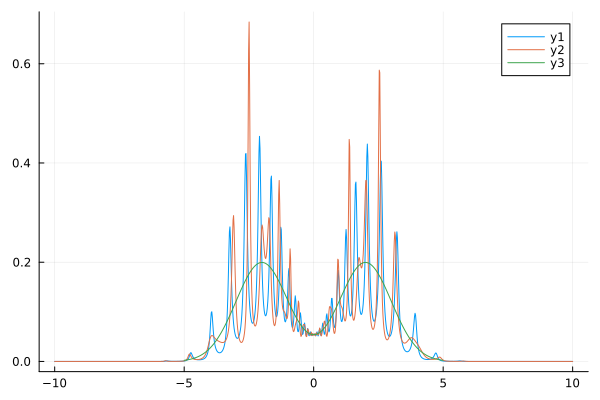

In [16]:
plot()
#plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
plot!(Float64.(real.((wo_ham_nev_sol.nev_struct.reals.freq))), Float64.(imag.(wo_ham_nev_sol.val))/pi)
plot!(Float64.(real.((ham_nev_sol.nev_struct.reals.freq))), Float64.(imag.(ham_nev_sol.val))/pi)
plot!(omegas, rho.(omegas))
#savefig("picture.png")

In [14]:
plot(xlim = [-6,6],
    legend = :topright,
    #ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
plot!(ylabel=latexstring("\\rho"))
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val/pi),label="non-opt",lw=3)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
#savefig("two_peak.svg")

LoadError: UndefVarError: sol not defined